## Ecuaciones útiles para el diseño del Lead por análisis en frecuencia

### Lead

$$D_c = \frac{T_Ds+1}{\alpha T_Ds+1}, \qquad \text{con } 0<\alpha < 1 $$

#### Cero del compensador:

$$z=\frac{-1}{T_D}$$

#### Polo del compensador

$$z=\frac{-1}{\alpha T_D}$$

#### relación entre el polo y el cero necesaria

$$\alpha(\phi_{mak}) = \frac{1-\sin{\phi_{max}}}{1+\sin{\phi_{max}}}$$

o misma relación escrita al reves

$$ \sin{\phi_{max}}=\frac{1-\alpha}{1+\alpha} $$

#### Frecuencia de máxima fase del compensador

$$\omega_{max} = \sqrt{|z||p|}$$

#### Ubicación del polo y del cero en función del $\omega_{max}$

$$z=-\omega_{max}\sqrt{\alpha}$$

$$p=-\frac{\omega_{max}}{\sqrt{\alpha}}$$



## Procedimiento de Diseño:



1.   Obtener $K$ para
  *   lograr el error requerido, o para 
  *   logar el ancho de bando requerido
2. Evaluar el margen de fase para el sistema con el $K$ anterior
3. Determinar la fase que es necesario agregar y agregarle hasta 10 grados más
4. Determinar el valor de $\alpha$
5. Elegir el $\omega_{max}$ que deseamos como la frecuencia de corte y ubicar el cero $z=-\omega_{max}\sqrt{\alpha}$ y el polo $p=\dfrac{-\omega_{max}}{\sqrt{\alpha}}$
6.Dibujar la respuesta el frecuencia del sistema con el compensador. Evaluar si se cumplen con los requerimientos.
7. Iterar sobre este diseño variando la posición del polo, del cero y de la ganancia. En caso de ser necesario usar dos compensadores.



## Ecuaciones útiles para el diseño del Lag por análisis en frecuencia

### Lag

$$D_c = \alpha \frac{T_Is+1}{\alpha T_Is+1}, \qquad \text{con } \alpha > 1$$

#### Cero del compensador:

$$z=\frac{-1}{T_I}$$

#### Polo del compensador

$$p=\frac{-1}{\alpha T_I}$$

#### La ganancia agregada será

$$K = \alpha$$

## Procedimiento de diseño de un Lag

1. Determinar la ganancia $K$ que permite cumplir con los requerimientos de margen de fase
2. Dibujar el Diagrama de bode del sistema sin compensar pero con el $K$ obtenido
3. Determinar el $\alpha$ que permita cumplir con las especificaciones de baja frecuencia (error en estado estacionario)
4. Elegir la posición del cero  del compensador que su frecuencia $\omega = \dfrac{1}{T_I}$ encuentre entre una octava y una decada más abajo que la nueva frecuencia de cruce $\omega_c$
5. La otra frecuencia será entonces $\omega=\dfrac{1}{\alpha T_I}$
6. Iterar en el diseño. Ajustar parámestros (polo, cero y ganancia) para cumplir todas las especificaciones.

## Ejemplo de diseño con un Lead

La siguiente planta representa un sistema térmico:

$$\frac{1}{(\frac{s}{0.5}+1)(s+1)(\frac{s}{2}+1)}$$

Con un compensador Lead logar los siguientes requerimientos:

1. Error de estado estacionario menor a 0.1 frente a una entrada escalón unitario
2. Margen de fase 40 grados


In [38]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5

Vamos a averiguar que sobrevalor esperamos para ese margen de fase

In [2]:
zeta=40/100
sv=np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
sv

0.2538267219801087

Ahora definimos nuestro sistema

In [3]:
s=ctrl.tf('s')
G=1/((s/0.5+1)*(s+1)*(s/2+1))
G


            1
-------------------------
s^3 + 3.5 s^2 + 3.5 s + 1

Y analizamos la ubicación de los polos a lazo abierto.

In [4]:
G.pole()

array([-2. , -1. , -0.5])

Vamos a analizar además la ganancia en estado estacionario.

In [39]:
ctrl.dcgain(G)

array(1.)

Esto es lo mismo que evaluar el módulo de la función $|G(s)|$ en $s=0$. Verificamos:

In [40]:
np.abs(G(0))

1.0

Definimos en $K$ la ganancia necesaria que debe tener nuestro sistema para que el error sea 0.1. Recordando que para un sistema de tipo 0

$$ \text{error} = \frac{1}{1+K} $$ 

Se tiene que:

$K$ debe ser igual a 9 para que el error sea 0.1.


In [41]:
K=9

Como nuestro sistema tiene y auna ganacia de 1, aplicandole el valor de $K$ obtendremos el error de estado estacinario requerido para el sistema. 

Vamos a analizar ahora que pasa con nuestro diagrama de Bode y los margenes de fase de estabilidad con esa ganancia.

In [42]:
ctrl.bode_plot(K*G, dB=True, margins=True);

In [43]:
_, pm, _, _,wp,_ = ctrl.stability_margins(K*G)
pm, wp

(7.124875100212705, 1.6844247549145053)

Vemos que tenemos 7 grados de margen de fase y en una frecuencia aproximada de 1.7 rad/seg. Sieguiendo las recomendaciones escritas anteriormente podemos definie el ángulo que queremos agregar. Debido a que tenemos 7 grados, necesitamos 40 gados en total y se recomienda dejarse 10 grados para ajustar, nos queda un $\phi_{max} = 40 - 7 + 10 =43$

In [44]:
phi_max=43

Vamos a pasar esto a rad

In [45]:
phi_max=phi_max*np.pi/180
phi_max

0.7504915783575616

Para lograr este ángulo máximo con un compensador de adelanto, se encesita un $\alpha$ de 

In [46]:
alpha = (1-np.sin(phi_max))/(1+np.sin(phi_max))
alpha

0.1890618014191675

Vamos a comenzar ubicando el máximo en el punto de donde cruza los 0 db el bode antes de poner el compensador. 

In [47]:
wmax=wp
wmax

1.6844247549145053

Ahora obtenemos el parámetro $T_D$ del lead:

In [48]:
TD=1/(wmax*np.sqrt(alpha))


Por útimo obtenemos las posiciones del polo y del cero

In [49]:
z=-1/TD
p=-1/(alpha*TD)

print(z, p)

-0.7324087281273646 -3.873911718970384


In [50]:
Dc=K*ctrl.tf([-1/z, 1],[-1/p, 1])
Dc


12.29 s + 9
------------
0.2581 s + 1

In [51]:
ctrl.bode([Dc,G, Dc*G], dB=True);

In [52]:
ctrl.stability_margins(Dc*G)

(1.5861221359594695,
 15.136384753425546,
 0.2118901590630817,
 3.4948275411263174,
 2.786203656020189,
 2.9826448553048595)

Podemos ver que el diseño no resultó como queriamos. Esto es debido a que como pusimos un lead con ganacia estacionaria igual a 1, nos agegó ganancia mayores a 1 en la zona de corte de 0 db, produciendo un aumento de la frecuencia en la que corta y una disminución de fase debido a que ahora este margen de fase se mide sobre una frecuencia mayor.

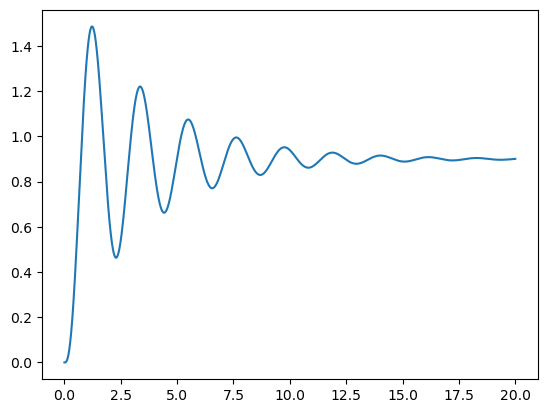

In [53]:
T=ctrl.feedback(Dc*G)
t,y = ctrl.step_response(T, np.linspace(0,20,1200))
plt.figure()
plt.plot(t,y)
plt.gcf()

In [54]:
ctrl.step_info(T)

{'RiseTime': 0.41849793326458445,
 'SettlingTime': 13.170376135091336,
 'SettlingMin': 0.4634127583178841,
 'SettlingMax': 1.4864462040184883,
 'Overshoot': 65.02885525950454,
 'Undershoot': 0.0,
 'Peak': 1.4864462040184883,
 'PeakTime': 1.2308762743076014,
 'SteadyStateValue': 0.9007189692257646}

### Rediseño
El problema está en que la frecuencia de corte se me corrión a la izquierda y los 10 gados que agregué no alcanzan para compensar la caida de fase de los tres polos de la planta.

Lo que voy a intentar es agregar mucha más fase y tratar de correr el cero para frecuencias más altas para que no moleste tanto su aumento módulo a en la frecuencia de corte.

Vamos a reescrbir todas las ecuacioes anteriores para que sea más facil de iterar y probar con diferentes valroes de $\phi_{max}$ y $\omega_{max}$.


In [55]:
phi_max=61*(np.pi)/180
alpha = (1-np.sin(phi_max))/(1+np.sin(phi_max))

wmax=5.1
TD=1/(wmax*np.sqrt(alpha))

z=-1/TD
p=z/alpha


Dc=K*ctrl.tf([-1/z,1],[-1/p,1])
print(Dc.zero(), Dc.pole(), Dc.dcgain(), alpha)

[-1.31894968] [-19.72023678] 9.0 0.06688305493807606


In [56]:
_,pm,_,_,wp,_=ctrl.stability_margins(Dc*G)
print(pm,wp)

40.32064090829252 2.2982369417072572


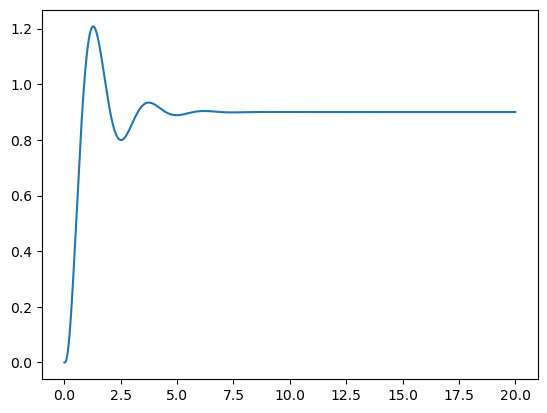

In [57]:
T=ctrl.feedback(Dc*G)
t,y = ctrl.step_response(T, np.linspace(0,20,1200))
plt.figure()
plt.plot(t,y)
plt.gcf()

In [58]:
ctrl.step_info(T)

{'RiseTime': 0.503381742963183,
 'SettlingTime': 4.184360738381459,
 'SettlingMin': 0.7992994053862986,
 'SettlingMax': 1.2076029521606715,
 'Overshoot': 34.28012076897646,
 'Undershoot': 0.0,
 'Peak': 1.2076029521606715,
 'PeakTime': 1.2741850368755572,
 'SteadyStateValue': 0.8993162541447991}

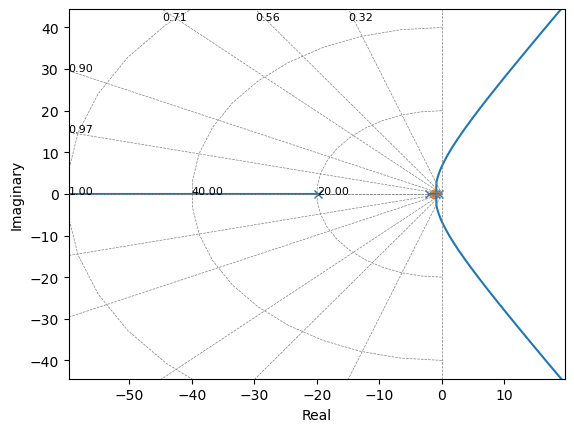

In [59]:
ctrl.rlocus(Dc*G);
plt.gcf()

## Problema
La sisguiente planta representa un sistema térmico:
$$\frac{1}{(\frac{s}{0.5}+1)(s+1)(\frac{s}{2}+1)}$$
Con un compensador Lag logar los siguientes requerimientos:

1. Error de estado estacionario menor a 0.1 frente a una entrada escalón unitario
2. Margen de fase 40 grados

Vamos a resolver el mismo problema que resolvimos anteriormente, pero ahora con un Lag.

/home/gonza/anaconda3/envs/dyc/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/gonza/anaconda3/envs/dyc/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


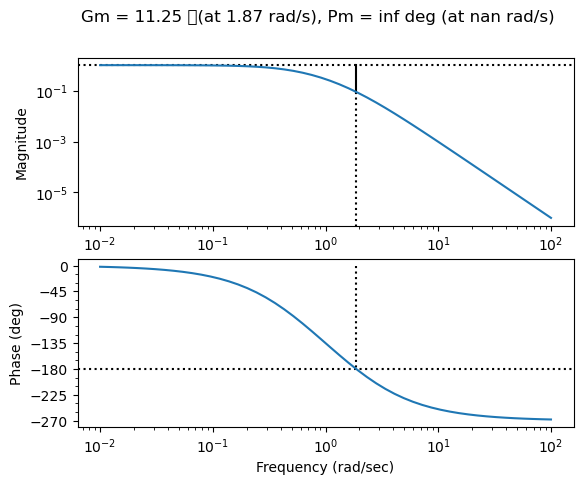

In [60]:
plt.figure()
ctrl.bode(G, margins=True);
plt.gcf()

Con el controlador Lag no podemos mejorar el margen de fase, ya que quita fase para toda $\omega$. Para lograr el margen de fase requerido vamos a darle una ganacia al sistema tal que la frecuencia de cruce por 0dB sea la necesria para que el margen de vase de lo necesario para cumplir con este requerimeinto.

Ya que nos piden un margen de fase de 40 grados, lo que vamos a hacer es ver a que frencuencua se tiene -140 de fase y vamos a ver que gancia es necesaria agregarle a la planta para que cruce por 0dB a esta frecuencia, esto es:

In [61]:
w1=1.j
K=1/np.abs(G(w1))
K

3.535533905932737

Verificamos calculando los margenes de  estabilidad

In [62]:
ctrl.stability_margins(K*G)

(3.1819805153394634,
 45.0,
 0.4993383331649862,
 1.8708286933869704,
 0.9999999999999999,
 1.3256908836478285)

Vemos que el margen de fase es de 45 grado (algo más de lo que requerimos) y la frecuencia de cruce por 0 db es 1, comoera de eseperar.

Ahora vemos a calcular el Lag para que nos agregué la ganancia necesaria para cumplir con el error

In [64]:
np.abs(K*G(0))

3.535533905932737

Calculamos la relación $\alpha$ entre el zero y el polo. Esto lo hacemos usando lo que ya sabemos que es que necesitamos una ganancia de 9 sobre la ganacia que tenemos. Esto nos dará la ganacia que necesitamos agregar

In [65]:
alpha = 9/ctrl.dcgain(G*K)
print(alpha)


2.545584412271572


Como criterio inicial podemos poner el cero del lag en una frecuencia 5 veces menor a la de cruce por 0 db

In [78]:
z=-np.abs(w1)/10
p=z/alpha
Dc2 = K*alpha*ctrl.tf([-1/z,1],[-1/p,1])
Dc2


  90 s + 9
-----------
25.46 s + 1

In [79]:
print(Dc2.dcgain(), Dc2.pole(), Dc2.zero())

9.0 [-0.03928371] [-0.1]


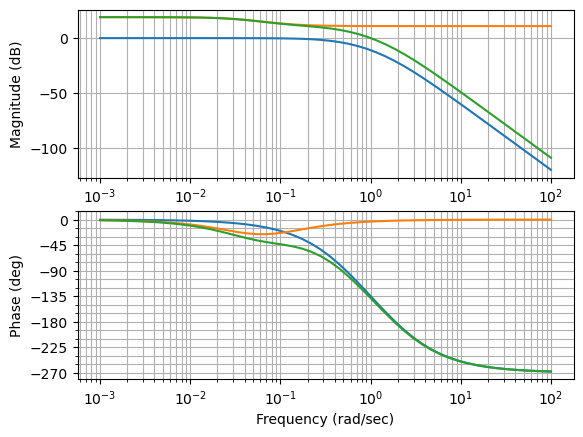

In [80]:
plt.figure()
ctrl.bode((G, Dc2, Dc2*G), dB=True);
plt.gcf()

In [81]:
ctrl.stability_margins(Dc2*G)

(2.9878632402163476,
 41.34117522250034,
 0.4741712245387997,
 1.8182652140041302,
 1.0027882283219218,
 1.2975135904967856)

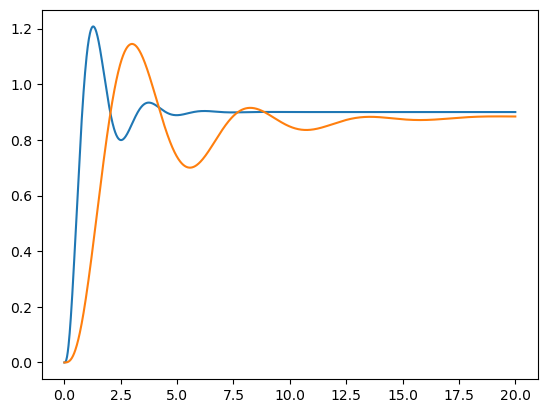

In [82]:
T1=ctrl.feedback(Dc2*G)
t1,y1 = ctrl.step_response(T1, T=np.linspace(0,20,1200))
plt.figure()
plt.plot(t,y,t1,y1)
plt.gcf()

In [83]:
ctrl.step_info(T1)

{'RiseTime': 1.2483485144743658,
 'SettlingTime': 18.023031677723655,
 'SettlingMin': 0.7002388159702999,
 'SettlingMax': 1.1445471790363353,
 'Overshoot': 27.184511784676936,
 'Undershoot': 0.0,
 'Peak': 1.1445471790363353,
 'PeakTime': 2.964827721876618,
 'SteadyStateValue': 0.8999108169507706}